- 그림 [1]  
low-resource data, 즉 데이터 중 크기가 작은 30%만 본다고 하자  
  
- 그림 [2]  
Temperature Sampling을 할 경우 low-resource는 더 많이, high-resource는 더 적게 sampling할 수 있다

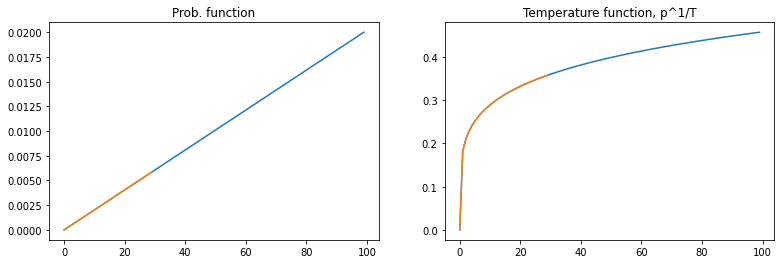

In [56]:
import numpy as np
import matplotlib.pyplot as plt


data = np.arange(0, 100)
# np.random.shuffle(data)
p = data / data.sum()

def TemperatureSampling(p, T):
    p_t = p ** (1/T)
    return p_t

p_t = TemperatureSampling(p, 5)

p_30 = p[:30]
p_t_30 = p_t[:30]

_, axes = plt.subplots(1,2, figsize=(13,4))

axes[0].plot(p)
axes[0].plot(p_30)
axes[0].set_title('Prob. function')
axes[1].plot(p_t)
axes[1].plot(p_t_30)
axes[1].set_title('Temperature function, p^1/T')
plt.show()

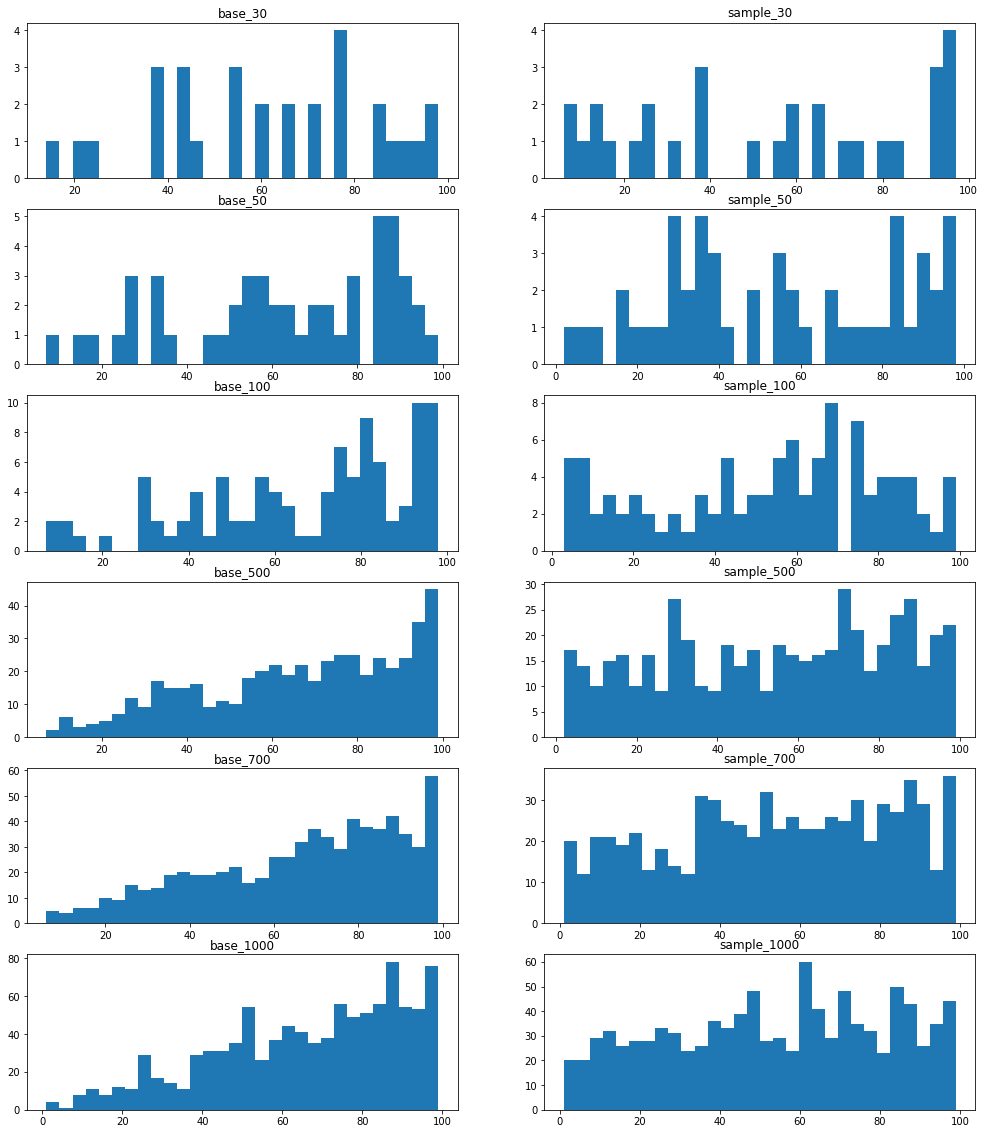

In [100]:
import pandas as pd
np.random.seed(42)
data = np.arange(0, 100, 1)

samples = []
for i in [30, 50, 100, 500, 700, 1000]:    
    thr = int(i * 0.3)
    globals()[f'base_{i}'] = np.random.choice(data, size=i, p=p)
    globals()[f'sample_{i}'] = np.random.choice(data, size=i, p=(p_t/p_t.sum()))
    samples.append(f'base_{i}')
    samples.append(f'sample_{i}')
    
_, axes = plt.subplots(6,2, figsize=(17, 20))
for ax, name in zip(axes.ravel(), samples):
    ax.hist(globals()[f'{name}'], bins=30)
    ax.set_title(name)